In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.metrics import accuracy_score
from tensorflow import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [23]:
model = tf.keras.models.load_model(r'C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\ResNet.keras')


In [2]:
test_folder = r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Dataset MAIN\test_data\test_data"


In [3]:
# Load the test data and create the test sets

test_csv = pd.read_csv(r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Dataset MAIN\test_labels.csv")
labels = test_csv['label'].values  # y_test
images = test_csv['image'].values
x_test = []

for imagePath in images:
    image = plt.imread(test_folder+ "\\" + imagePath)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((32, 32))
    x_test.append(np.array(image))

x_test = np.array(x_test)
x_test = x_test/255

In [4]:
from keras.utils import to_categorical

labels_one_hot = to_categorical(labels)


In [9]:
# Modeli Değerlendirme
test_loss, test_acc = model.evaluate(x_test, labels_one_hot)
print('Test accuracy:', test_acc)

395/395 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.8511 - loss: 2.8299
Test accuracy: 0.8514647483825684


In [11]:
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# 'vgg_model_unfreeze_2block' adlı eğitilmiş modelinizin yüklendiği varsayılıyor.
# Eğer bir dosyaya kaydedilmişse, yükleyebilirsiniz: model = load_model('sizin_modelinizin_yolu.h5')

# Adım 1: Olasılıkları tahmin edin ve sınıf etiketlerine dönüştürün
tahminler = model.predict(x_test)  # Olasılıkları tahmin edin
tahmin_edilen_sınıflar = np.argmax(tahminler, axis=1)  # Olasılıkları sınıf etiketlerine dönüştürün

# Adım 2: Gerekiyorsa one-hot kodlu etiketleri sınıf etiketlerine dönüştürün
gerçek_sınıflar = np.argmax(labels_one_hot, axis=1)  # One-hot kodlu etiketleri sınıf etiketlerine dönüştürün

# Adım 3: Metrikleri Hesapla
macro_precision = precision_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')
macro_recall = recall_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')
macro_f1_score = f1_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')

micro_precision = precision_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')
micro_recall = recall_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')
micro_f1_score = f1_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')

karışıklık_matrisi = confusion_matrix(gerçek_sınıflar, tahmin_edilen_sınıflar)

# Sonuçları Göster
print("Macro-Ortalama Kesinlik:", macro_precision)
print("Macro-Ortalama Duyarlılık:", macro_recall)
print("Macro-Ortalama F1 Skoru:", macro_f1_score)
print("\nMikro-Ortalama Kesinlik:", micro_precision)
print("Mikro-Ortalama Duyarlılık:", micro_recall)
print("Mikro-Ortalama F1 Skoru:", micro_f1_score)


395/395 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step
Macro-Ortalama Kesinlik: 0.843775987612555
Macro-Ortalama Duyarlılık: 0.8254734522022186
Macro-Ortalama F1 Skoru: 0.8135498717071407

Mikro-Ortalama Kesinlik: 0.8514647664291369
Mikro-Ortalama Duyarlılık: 0.8514647664291369
Mikro-Ortalama F1 Skoru: 0.8514647664291369


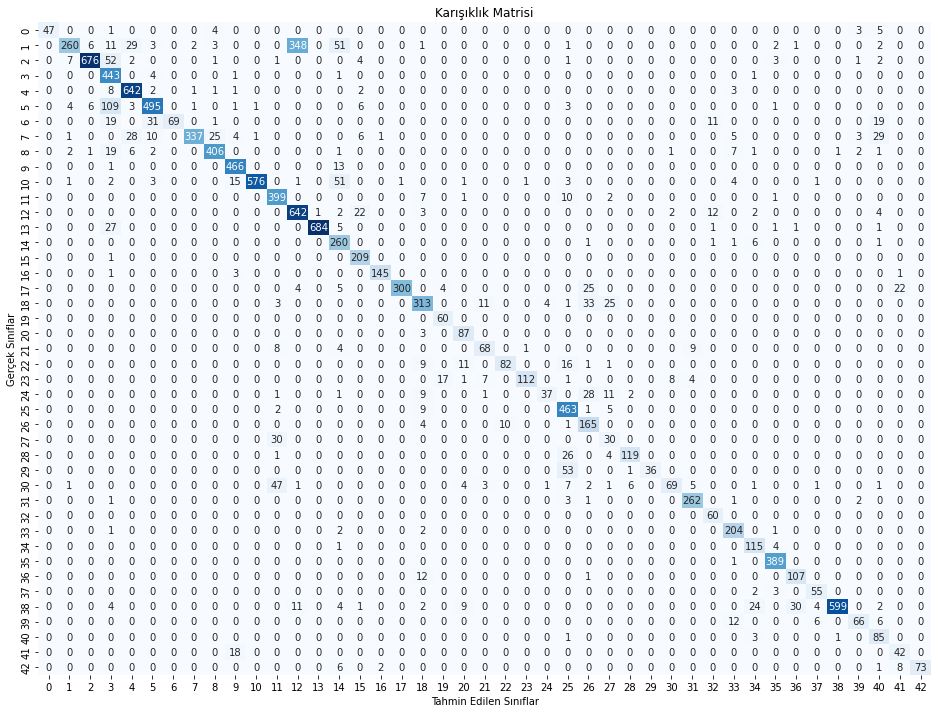

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(16, 12))
sns.heatmap(karışıklık_matrisi, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen Sınıflar")
plt.ylabel("Gerçek Sınıflar")
plt.show()


In [24]:
from sklearn.metrics import accuracy_score

from tensorflow.keras.preprocessing import image

# Görüntüyü yükle ve boyutlandır
img = image.load_img(r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Full_Image\0.jpg", target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Tek bir örnek oluşturmak için boyut ekleyin

# Modeli kullanarak tahmin yapın
predictions = model.predict(img_array)


# Modelin tahmin ettiği olasılıklar
prediction_vector = np.array(predictions)

# En yüksek olasılığa sahip olan sınıfın indeksi
predicted_class_index = np.argmax(prediction_vector)

print(predicted_class_index)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
14


In [22]:
from PIL import Image

# Görüntüyü yükleyin ve boyutunu değiştirin
image = Image.open(image_path)
image = image.resize((32, 32))

# Görüntüyü modeldeki giriş şekline dönüştürün (ör. (32, 32, 3) bir görüntüyü (1, 32, 32, 3) şekline dönüştürün)
image_array = np.expand_dims(np.array(image), axis=0)

# Tahmin yapın
pred = model.predict(image_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
